In [1]:
%load_ext autoreload
%autoreload 2
%run pf_data.py '../pflotran_model/hydrothermal.nc'

Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite', 'Annite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite', 'Clinochlore'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'inosilicates': ['Prehnite'], 'talc': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite'], 'quartz': ['Quartz'], 'mica': ['Annite']}


In [2]:
# Parameters
basecase = 4
time = 1000
pf_data = pf_data.sel(file_number=basecase)

In [3]:
print(f"High T: {pf_data['percentage_alteration'].sel(time=time).where(pf_data['Temperature'] > 250).mean().values} ± {pf_data['percentage_alteration'].sel(time=time).where(pf_data['Temperature'] > 250).std().values}")
print(f"Low T: {pf_data['percentage_alteration'].sel(time=time).where(pf_data['Temperature'] < 250).mean().values} ± {pf_data['percentage_alteration'].sel(time=time).where(pf_data['Temperature'] < 250).std().values}")
print(f"Max alteration in 150-250 region: {pf_data['percentage_alteration'].sel(time=time).where((pf_data['Temperature'] < 250) & (pf_data['Temperature']> 150)).max().values}")

High T: 15.69506858331649 ± 6.201836791700503
Low T: 0.2566254264268534 ± 0.7452775594383139
Max alteration in 150-250 region: 5.49931362960389


/var/folders/86/d5n0l2wj5yn0p84q_4jzm_6r0000gn/T/ipykernel_2920/2232395556.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(y_ticks[::-1])
/var/folders/86/d5n0l2wj5yn0p84q_4jzm_6r0000gn/T/ipykernel_2920/2232395556.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


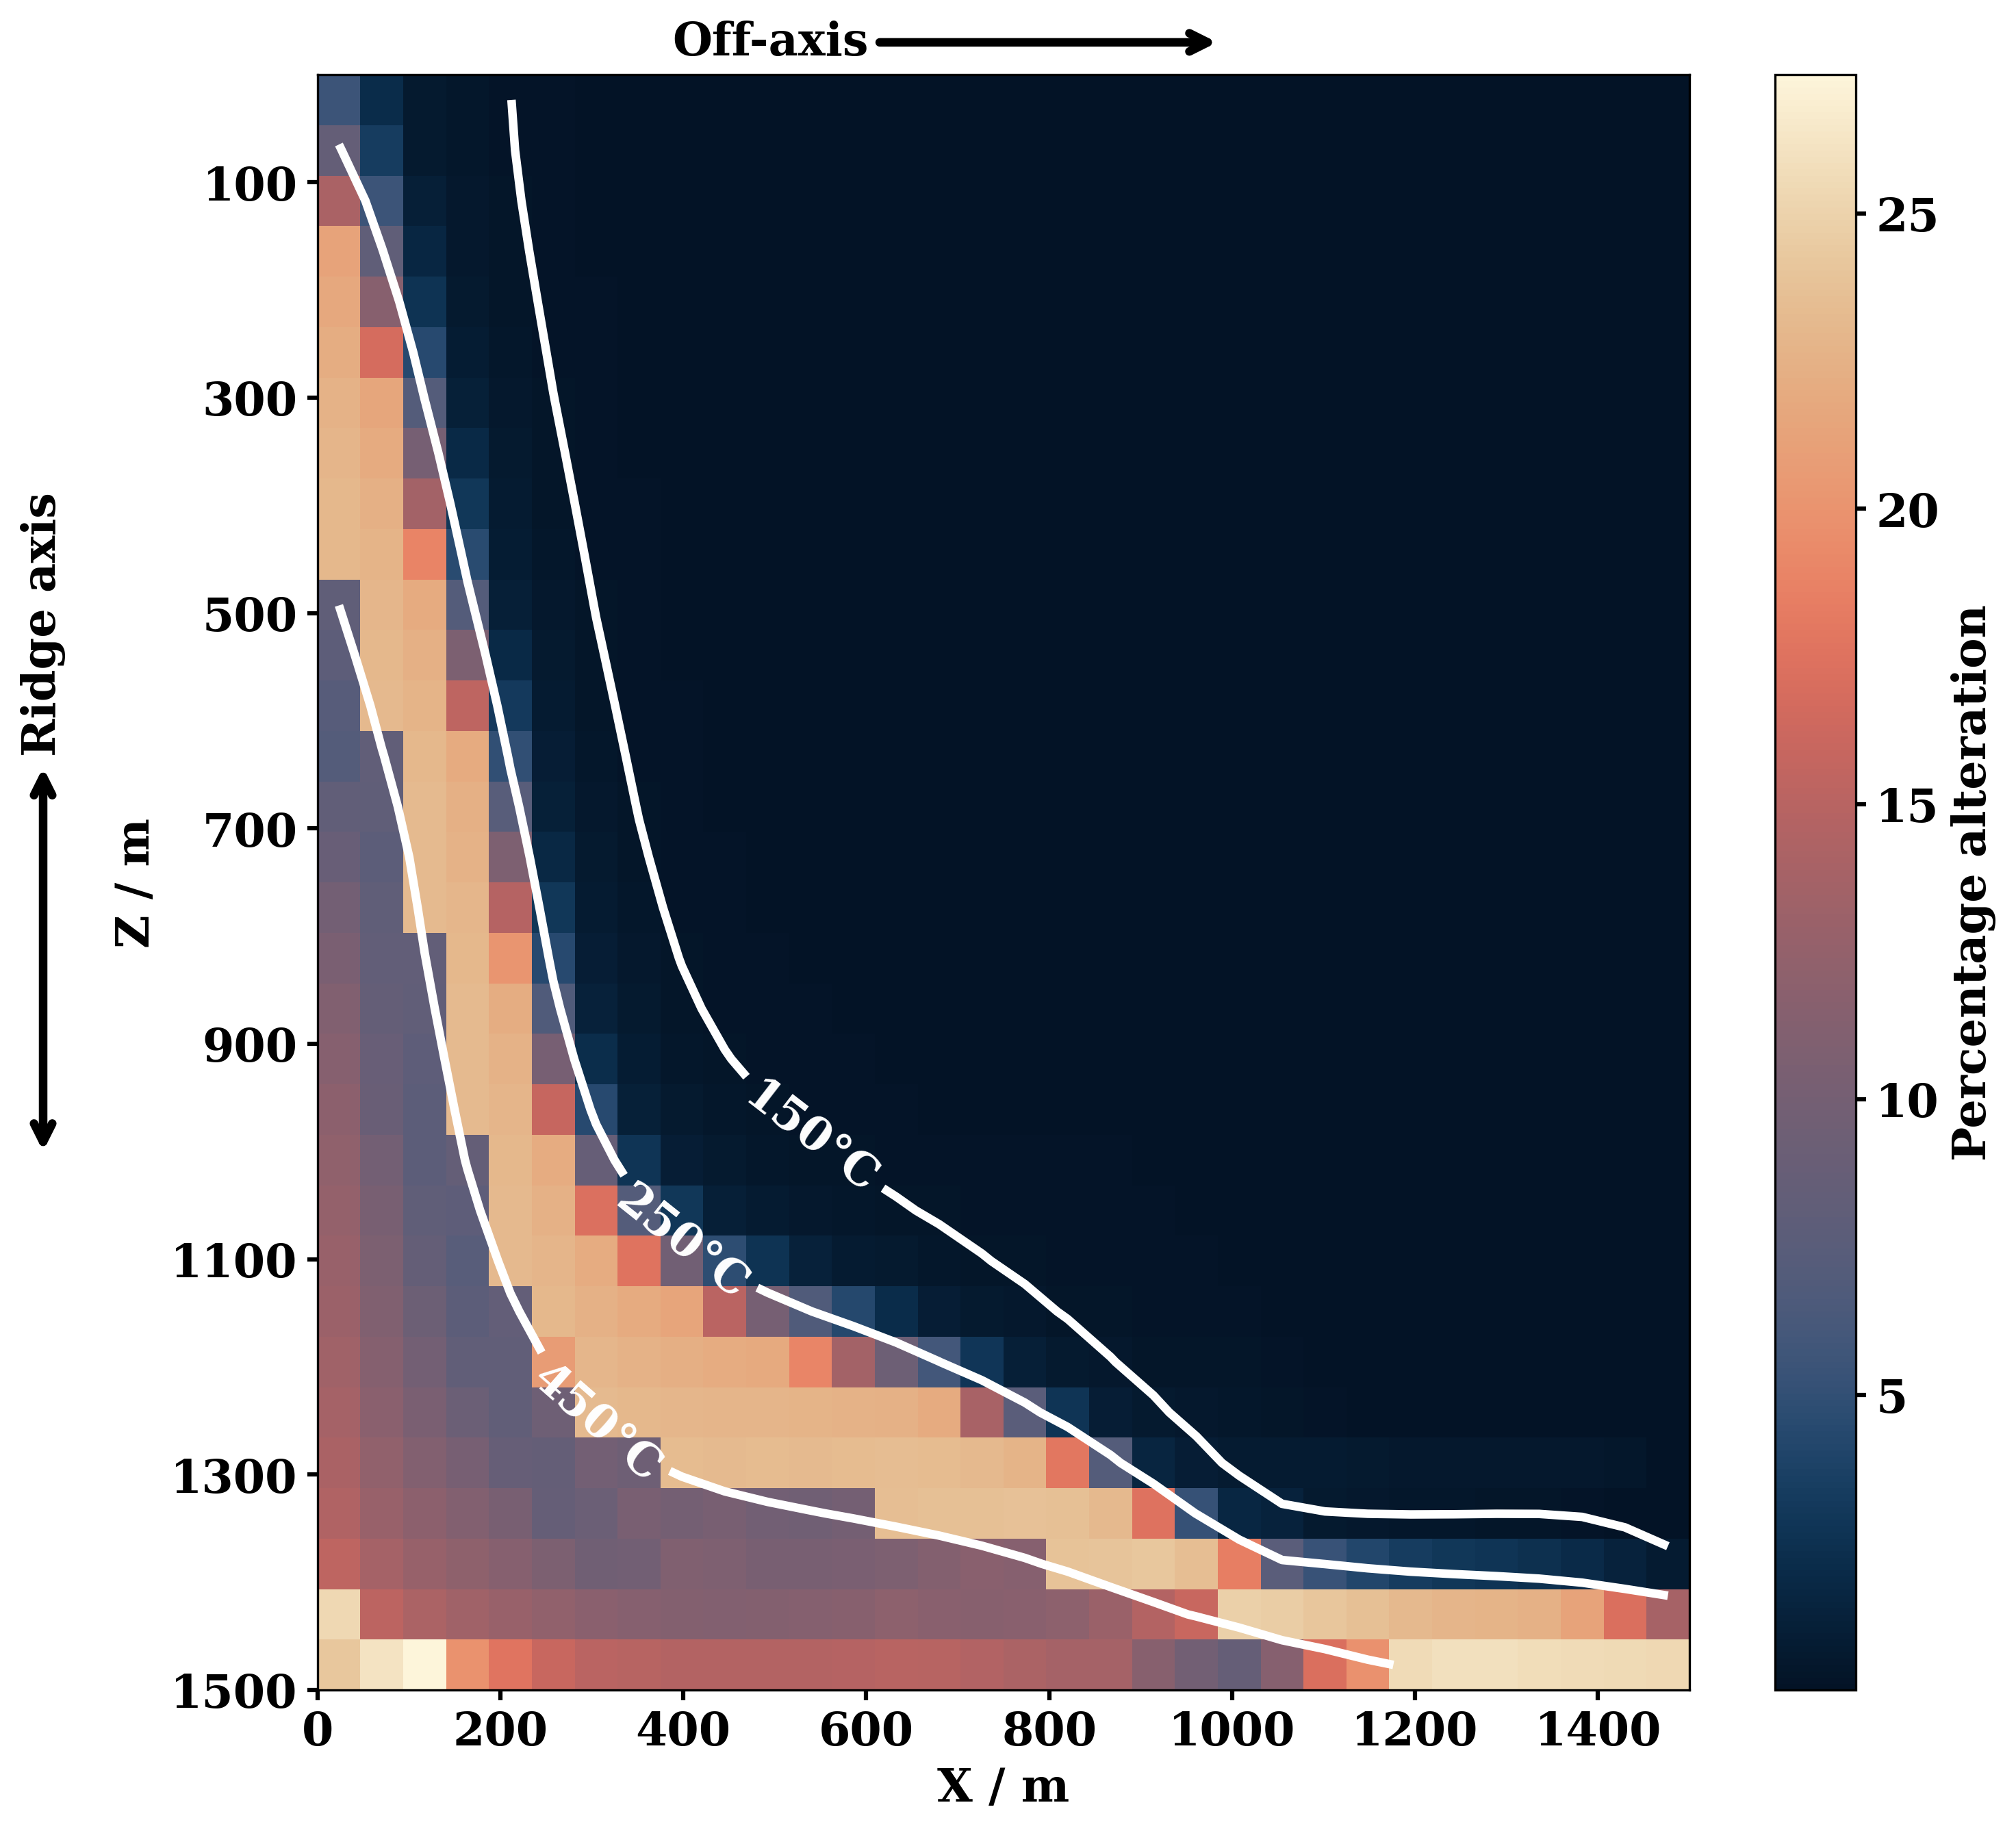

In [4]:
from matplotlib import pyplot as plt
from matplotlib import cycler
import numpy as np
import figures as figs
import cmcrameri.cm as cm
import matplotlib.patches as mpatches

# Set custom style and font size
plt.style.use('custom.mplstyle')

# Create figure and axis array for subplots (3 rows, 2 columns)
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax = [ax]

# List of identifying capital letters for each subplot
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']

# PF alteration plot
# Plot percentage alteration using a colormap
mesh = ax[0].pcolormesh(
    pf_data['x'], pf_data['z'], 
    pf_data['percentage_alteration'].sel(time=time, method='nearest').squeeze(), 
    cmap=cm.lipari, shading='auto'
)
ax[0].set_xlabel('X / m')
ax[0].set_ylabel('Z / m')
fig.colorbar(mesh, ax=ax[0], label='Percentage alteration')  # Add color bar

# Add temperature contours at 150°C, 250°C, 450°C with white color
temperature_data = pf_data['Temperature'].sel(time=time, method='nearest').squeeze()
contour_levels = [150, 250, 450]  # Temperature levels in °C
contours = ax[0].contour(
    pf_data['x'], pf_data['z'], temperature_data, 
    levels=contour_levels, 
    colors='white', 
    linewidths=3
)

# Add contour labels
ax[0].clabel(contours, inline=True, fontsize=16, fmt='%d°C')

ax[0].annotate('Off-axis', xy=(0.66, 1.02), xytext=(0.33, 1.02), xycoords='axes fraction', textcoords='axes fraction', 
                   ha='center', va='center', arrowprops=dict(arrowstyle='->', color='black', lw=3), fontsize=16)

ax[0].annotate('Ridge axis', xy=(-0.2, 0.33), xytext=(-0.2, 0.66), xycoords='axes fraction', textcoords='axes fraction', 
                   ha='center', va='center', rotation=90,arrowprops=dict(arrowstyle='<->', color='black', lw=3), fontsize=16)

# Get the current y-ticks
y_ticks = [100, 300, 500, 700, 900, 1100, 1300, 1500]
# Set the y-ticks with reversed labels
ax[0].set_yticklabels(y_ticks[::-1])


# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('output/figure_3.png', dpi=300)
fig.show()
